In [2]:
# Check if platipy is installed, if not install it.
try:
    import platipy
except:
    !pip install git+https://github.com/pyplati/platipy.git
    import platipy

# The ImageVisualiser clas
from platipy.imaging import ImageVisualiser

# Function to grab some test data
from platipy.imaging.tests.data import get_lung_nifti

# Usual suspects
import numpy as np
import SimpleITK as sitk
from pathlib import Path
import matplotlib.pyplot as plt

# Some utilities we use for generating interesting data
from platipy.imaging.registration.utils import convert_mask_to_reg_structure, apply_transform
from platipy.imaging.registration.deformable import fast_symmetric_forces_demons_registration
from platipy.imaging.generation.dvf import generate_field_asymmetric_extend
from platipy.imaging.label.utils import get_com
from platipy.imaging.utils.crop import label_to_roi

2021-08-28 17:27:44.018 | DEBUG    | platipy.imaging.tests.data:get_lung_nifti:63 - Output directory exists, stopping. data\nifti\lung


In [4]:
input_directory

WindowsPath('data/nifti/lung')

In [60]:
pat_directory = input_directory.joinpath("PRHGD5257")

# Read in the CT image
ct_filename = next(pat_directory.glob("**/IMAGES/*.nii.gz"))
ct_image = sitk.ReadImage(ct_filename.as_posix())

# Read in the RTStruct contours as binary masks
contour_filename_list = list(pat_directory.glob("**/STRUCTURES/*.nii.gz"))

contours = {}
for contour_filename in contour_filename_list:
    _name = contour_filename.name.split(".nii.gz")[0].split("RTSTRUCT_")[-1]
    print(contour_filename)
    contours[_name] = sitk.ReadImage(contour_filename.as_posix())

data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_100%_(Trial_2).nii.gz
data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_4th_Rib.nii.gz
data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_5th_Rib.nii.gz
data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_6th_Rib.nii.gz
data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_98%_(Trial_2).nii.gz
data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_CARINA.nii.gz
data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_CHESTWALL.nii.gz
data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_Chest_wall.nii.gz
data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_contour_check.nii.gz
data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_External-5mm.nii.gz
data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_External-PTV+2CM.nii.gz
data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_External.nii.gz
data\nifti\lung\PRHGD5257\STRUCTURES\PRHGD5257_RTSTRUCT_great_vessels.nii.gz
data\nifti\lung\PRHGD5257\STRUCTU

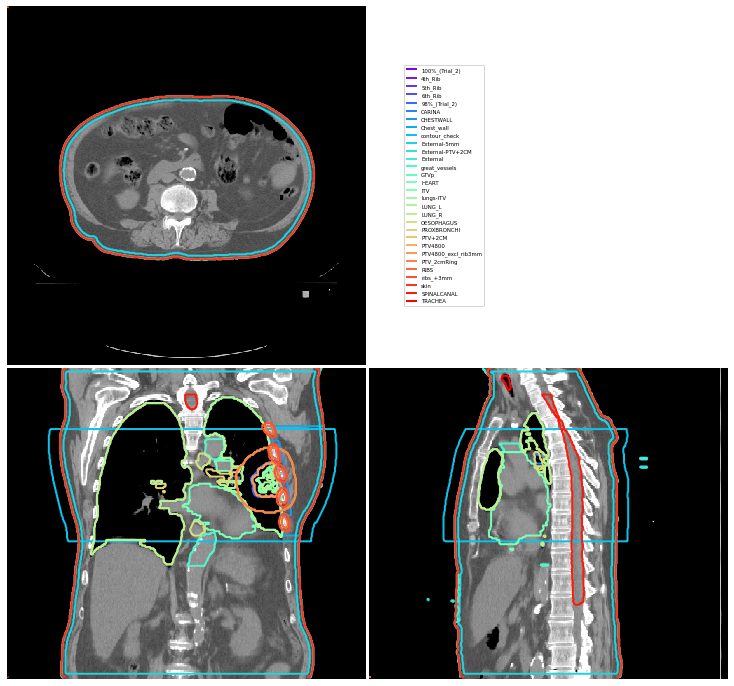

In [61]:
image_visualiser = ImageVisualiser(ct_image, cut=(10,256,256))
image_visualiser.add_contour(contours)
fig = image_visualiser.show()

In [66]:
contours["LUNG_EXPAND"], tfm_expansion, dvf_expansion = generate_field_asymmetric_extend(contours["LUNG_L"])

In [63]:
contours

{'100%_(Trial_2)': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x0000014F5DA2F2D0> >,
 '4th_Rib': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x0000014F5DA2FE70> >,
 '5th_Rib': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x0000014F5DA2F9F0> >,
 '6th_Rib': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x0000014F5DA2FC30> >,
 '98%_(Trial_2)': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000001506066CD80> >,
 'CARINA': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x00000150606E40F0> >,
 'CHESTWALL': <SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::valu

In [67]:
ct_image_deformed = apply_transform(
    input_image=ct_image,
    reference_image=None,
    transform=tfm_expansion,
    default_value=-1000,
    interpolator=sitk.sitkBSpline,
)

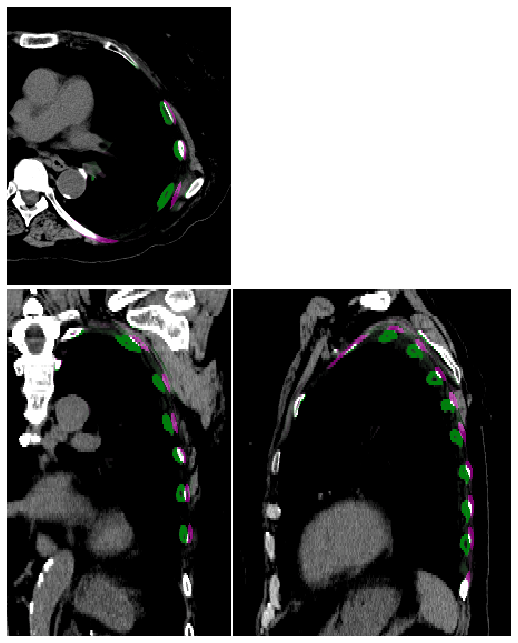

In [69]:
image_visualiser = ImageVisualiser(ct_image, cut=get_com(contours["LUNG_L"]), figure_size_in=7, window=(-40, 200))

image_visualiser.add_comparison_overlay(ct_image_deformed)

image_visualiser.set_limits_from_label(contours["LUNG_EXPAND"], expansion=40)

fig = image_visualiser.show()

In [12]:
contours["HEART"]

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x0000014F5D82B990> >

In [13]:
contours["HEART_EXPAND"]

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x0000014F43B18450> >

In [23]:
input_directory

WindowsPath('data/nifti/lung')

In [50]:
pat_directory = "./PRHGD5257/RT.CT"


In [51]:
rtss_path = "./PRHGD5257/RT.CT/rtss.dcm"

In [35]:
import platipy.dicom.io as io

In [37]:
from platipy.dicom.io import rtstruct_to_nifti

In [43]:
pat_directory

WindowsPath('data/nifti/lung/PRHGD5257_LUNG')

In [54]:
import SimpleITK as sitk



In [56]:
file_name = "./PRHGD5257/RT.CT/ct.1.dcm"
data_directory = "./PRHGD5257/RT.CT"

# Read the file's meta-information without reading bulk pixel data
file_reader = sitk.ImageFileReader()
file_reader.SetFileName(file_name)
file_reader.ReadImageInformation()

# Get the sorted file names, opens all files in the directory and reads the meta-information
# without reading the bulk pixel data
series_ID = file_reader.GetMetaData('0020|000e')
sorted_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(data_directory, series_ID)

# Read the bulk pixel data
img = sitk.ReadImage(sorted_file_names)

In [59]:
sitk.WriteImage(img, "./data/nifti/lung/PRHGD5257/IMAGES/PRHGD5257.nii.gz")

In [53]:
rtstruct_to_nifti.convert_rtstruct(pat_directory, rtss_path, prefix='PRHGD5257_RTSTRUCT_', output_dir='./data/nifti/lung/PRHGD5257/STRUCTURES', output_img=None, spacing=None)

2021-08-28 18:08:50.401 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:convert_rtstruct:223 - Converting RTStruct: ./PRHGD5257/RT.CT/rtss.dcm
2021-08-28 18:08:50.402 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:convert_rtstruct:224 - Using image series: ./PRHGD5257/RT.CT
2021-08-28 18:08:50.403 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:convert_rtstruct:225 - Output file prefix: PRHGD5257_RTSTRUCT_
2021-08-28 18:08:50.404 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:convert_rtstruct:226 - Output directory: ./data/nifti/lung/PRHGD5257/STRUCTURES
2021-08-28 18:08:50.876 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:transform_point_set_from_dicom_struct:134 - Converting structure 0 with name: ISO
2021-08-28 18:08:50.877 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:transform_point_set_from_dicom_struct:152 - This is not a closed planar structure, skipping.
2021-08-28 18:08:50.878 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:transform_point_set_from_dicom_struct:134 - Co

2021-08-28 18:11:24.265 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:convert_rtstruct:265 - Writing file to: data\nifti\lung\PRHGD5257\STRUCTURES
2021-08-28 18:11:24.595 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:convert_rtstruct:265 - Writing file to: data\nifti\lung\PRHGD5257\STRUCTURES
2021-08-28 18:11:24.875 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:convert_rtstruct:265 - Writing file to: data\nifti\lung\PRHGD5257\STRUCTURES
2021-08-28 18:11:25.159 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:convert_rtstruct:265 - Writing file to: data\nifti\lung\PRHGD5257\STRUCTURES
2021-08-28 18:11:25.451 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:convert_rtstruct:265 - Writing file to: data\nifti\lung\PRHGD5257\STRUCTURES
2021-08-28 18:11:25.753 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:convert_rtstruct:265 - Writing file to: data\nifti\lung\PRHGD5257\STRUCTURES
2021-08-28 18:11:26.110 | DEBUG    | platipy.dicom.io.rtstruct_to_nifti:convert_rtstruct:265 - Writing fil